Testing Images


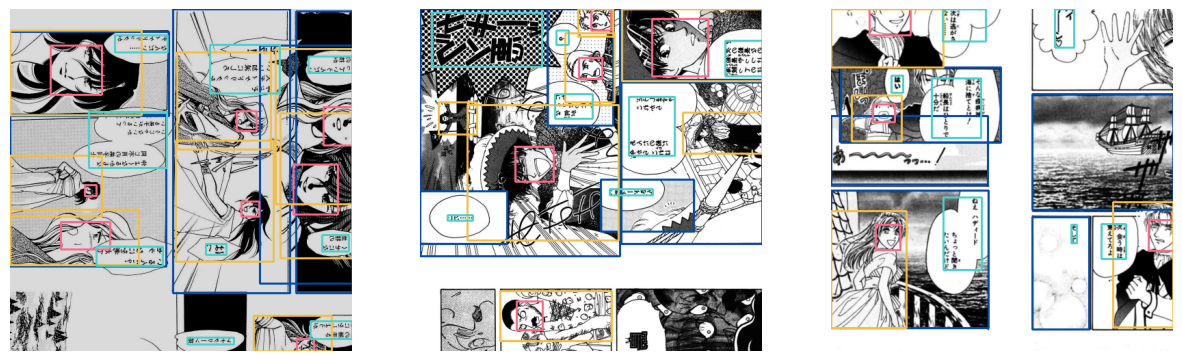

Validation Images


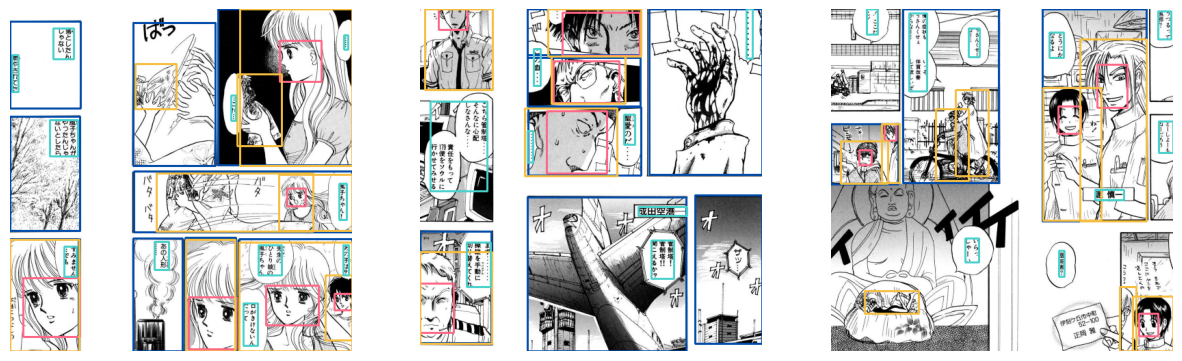

In [7]:
print("Testing Images")
dataloader_images(train_loader, label_colors)
print("Validation Images")
dataloader_images(valid_loader, label_colors)

## Model

In [8]:
# load Faster RCNN pre-trained model (change weights?)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

# get the number of input features 
in_features = model.roi_heads.box_predictor.cls_score.in_features
# define a new head for the detector with required number of classes
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=4+1)

## Training

In [9]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = model.to(device)
params = [p for p in model.parameters() if p.requires_grad]  # get the model parameters

# define the optimizer
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)

num_epochs = 10
train_model(device, model, optimizer, train_loader, valid_loader, num_epochs=num_epochs)


EPOCH 1 of 10
Training


Loss: 1.6208:  26%|██▌       | 68/260 [01:45<04:57,  1.55s/it]


KeyboardInterrupt: 

## Training Evaluation

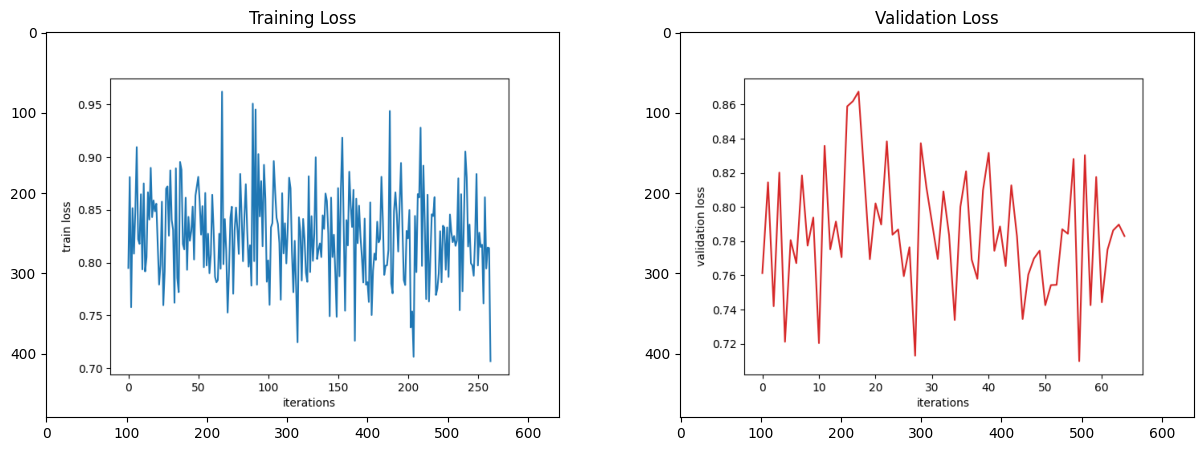

In [11]:
image1_path = "./Results/train_loss.png"
image2_path = "./Results/valid_loss.png"
results_images(image1_path, image2_path)

## Testing Evaluation

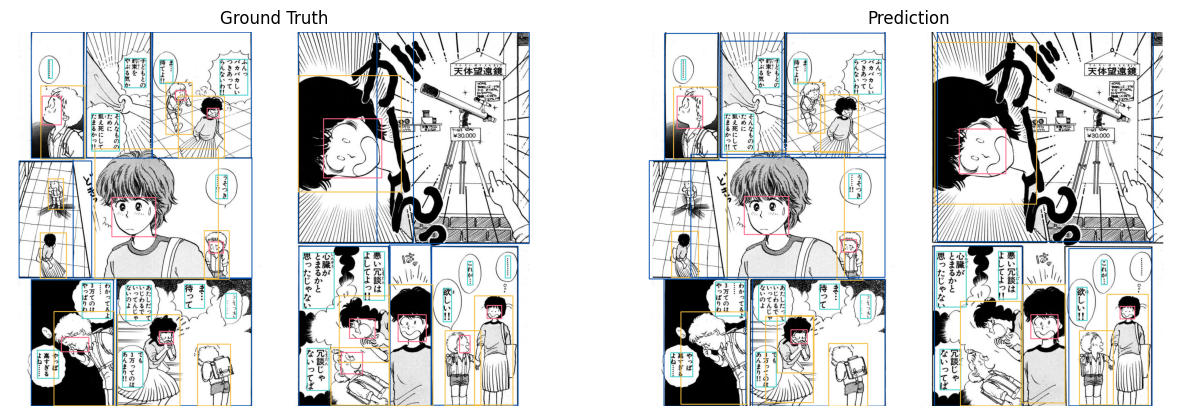

Number of original bboxes:  59
Number of predicted bboxes:  49
IoU score 1: 0.9737126566490467
IoU score 2: 0.9141478453186783
IoU score 3: 0.9411764705882353
IoU score 4: 0.8311280185246444
IoU score 5: 0.6264426610729745
IoU score 6: 0.8833438017472734
IoU score 7: 0.885016412434833
IoU score 8: 0.8775641025641026
IoU score 9: 0.938807993869009
IoU score 10: 0.9486988847583643
IoU score 11: 0.9779356129945571
IoU score 12: 0.9583598772224474
IoU score 13: 0.51345295791984
IoU score 14: 0.863755282753069
IoU score 15: 0.9229718656104889
IoU score 16: 0.829802929708083
IoU score 17: 0.8772799365582871
IoU score 18: 0.8709099058718064
IoU score 19: 0.9414805242754292
IoU score 20: 0.9160137887809464
IoU score 21: 0.9620279146141215
IoU score 22: 0.9383394383394383
IoU score 23: 0.9037416305632139
IoU score 24: 0.7651515151515151
IoU score 25: 0.9487179487179487
IoU score 26: 0.7897815912636506
IoU score 27: 0.9558785489069261
IoU score 28: 0.9202702702702703
IoU score 29: 0.838513513513

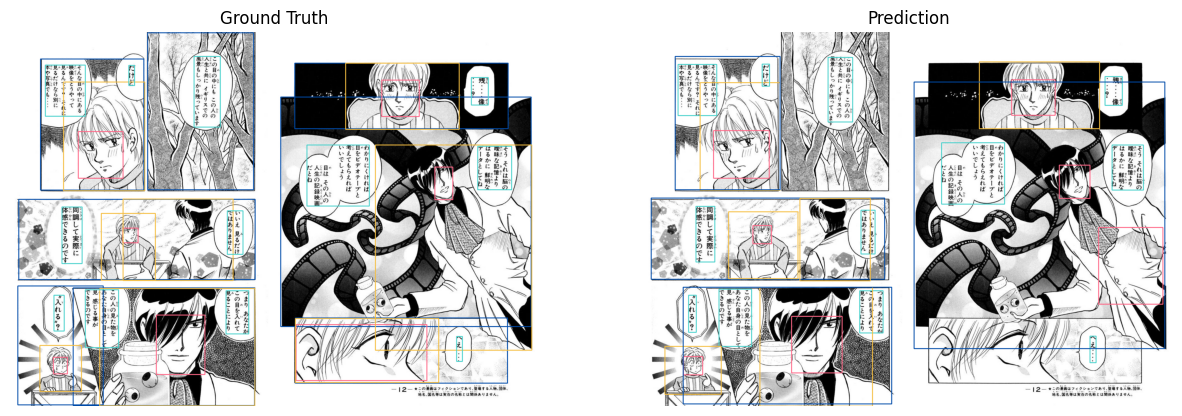

Number of original bboxes:  35
Number of predicted bboxes:  29
IoU score 1: 0.9308513407966675
IoU score 2: 0.8855993101465939
IoU score 3: 0.9515686871763631
IoU score 4: 0.8269082498072475
IoU score 5: 0.9556625311743708
IoU score 6: 0.9070470480642211
IoU score 7: 0.8941365892929022
IoU score 8: 0.8428924059822854
IoU score 9: 0.9378600823045268
IoU score 10: 0.7462660721243344
IoU score 11: 0.900523560209424
IoU score 12: 0.8582937865577751
IoU score 13: 0.5575850519752024
IoU score 14: 0.9177869700103413
IoU score 15: 0.5889145496535797
IoU score 16: 0.7490003772161449
IoU score 17: 0.871979229079289
IoU score 18: 0.8012084592145015
IoU score 19: 0.6046566739735766
IoU score 20: 0.945204542345054
IoU score 21: 0.6227192466156563
IoU score 22: 0.6842105263157895
IoU score 23: 0.7145557655954632
IoU score 24: 0.9519421101097036
IoU score 25: 0.6223589117189431
IoU score 26: 0.6690058479532164
IoU score 27: 0.7304347826086957
IoU score 28: 0.6166501637596161
IoU score 29: 0.718667074

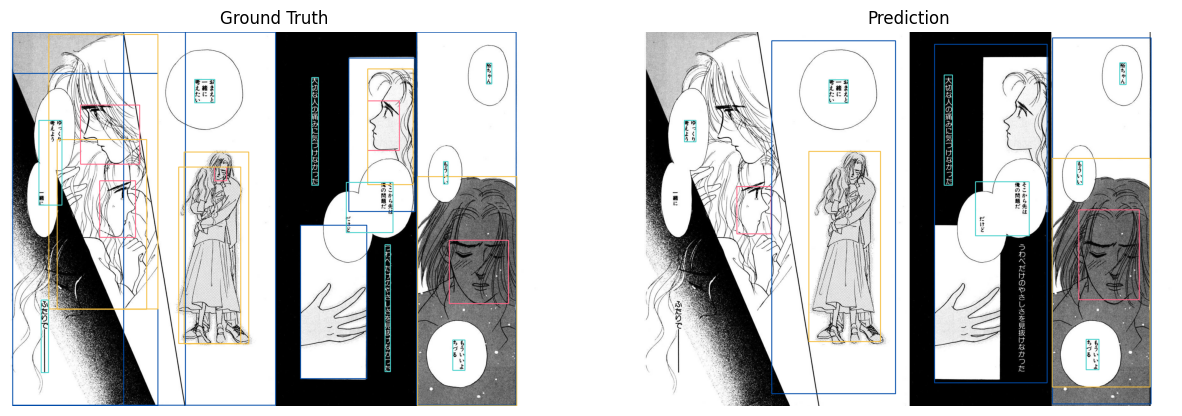

Number of original bboxes:  26
Number of predicted bboxes:  14
IoU score 1: 0.9117647058823529
IoU score 2: 0.927237604636188
IoU score 3: 0.8125
IoU score 4: 0.8328351759155893
IoU score 5: 0.7878670673291482
IoU score 6: 0.8073400958016342
IoU score 7: 0.7340984244310446
IoU score 8: 0.9531978426298953
IoU score 9: 0.6120150398286289
IoU score 10: 0.745814307458143
IoU score 11: 0.6028318964448375
IoU score 12: 0.8399579495394474
IoU score 13: 0.7707536192666757
IoU score 14: 0.7889632107023411
IoU score 15: 0.5691653989403557
TEST PREDICTIONS COMPLETE


In [12]:
# load trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=4+1)

checkpoint = torch.load('./Results/last_model.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device).eval()

test_model(test_df, model, device, label_colors) # display ground truths, predictions, and IoU metrics